## Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework
### José Carlos Sánchez Gómez A0174050
### 19 de agosto del 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Separación de los datos en train y test, junto con la declaracion de las tetas y alpha (correción)

In [34]:
data = pd.read_csv("../../../Valhalla23.csv")
train_set, test_set = train_test_split(data, test_size=0.2)
theta_zero, theta_one = 1, 1
alpha = 0.0001
hipotesis = lambda theta_zero, theta_one, x : theta_zero + theta_one * x
n = len(train_set)

La alfa fue escogida a con base a prueba y error, de esa manera se encontró que esta alfa se ajusta bien al modelo.
Para los valores de theta1 y theta0 se decidió utilizar valores unitarios para el inicio del modelo.

### Entrenamiento del modelo con 50,000 iteraciones (correción)

In [37]:
celsius = train_set["Celsius"]
valks = train_set["Valks"]
for _ in range(50000):
  delta = [hipotesis(theta_zero, theta_one, celsius.iloc[i]) - valks.iloc[i] for i in range(len(celsius))]
  delta_x = [delta[i] * celsius.iloc[i] for i in range(len(celsius))]
  total_delta, total_delta_x = sum(delta) / n, sum(delta_x) / n
  theta_zero = theta_zero - alpha * total_delta
  theta_one = theta_one - alpha * total_delta_x

### Comparando los resultados de los modelos usando los datos de test, contra los valores originales

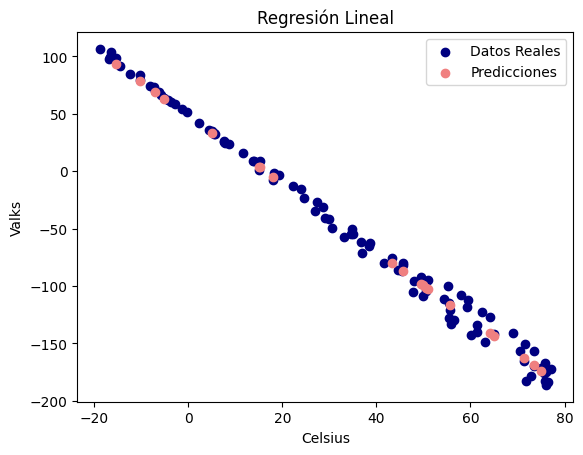

In [38]:
predicciones = [hipotesis(theta_zero, theta_one, test_set["Celsius"].iloc[i]) for i in range(len(test_set["Celsius"]))]
plt.scatter(data["Celsius"], data["Valks"], color="navy")
plt.scatter(test_set["Celsius"], predicciones, color="lightcoral")
plt.legend(["Datos Reales", "Predicciones"])
plt.xlabel("Celsius")
plt.ylabel("Valks")
plt.title("Regresión Lineal")
plt.show()

### Calculando la funcion de costo para el subconjunto de entrenamiento y prueba

In [40]:
test_mse = ((test_set["Valks"] - predicciones) ** 2).mean()
print("Error de entrenamiento:", test_mse)
train_values = [hipotesis(theta_zero, theta_one, train_set["Celsius"].iloc[i]) for i in range(len(train_set["Celsius"]))]
train_mse = ((train_set["Valks"] - train_values) ** 2).mean()

print("Error de prueba:", train_mse)

Error de entrenamiento: 27.692137698473307
Error de prueba: 49.67396036011504


In [33]:
!jupyter nbconvert --to html /Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework.ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[NbConvertApp] WARNING | pattern '/Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework.ipynb' matched no files


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr